# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [25]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [15]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)
sum(data[data.race=='b'].call)
sum(data.race=='b')
sum(data.race=='w')

2435

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>
For bootstrap approach, we should use permutation test. For frequentist approach, two sample t-test can be used.

CLT should work because the observed success (call being 1) and failure are greater than 10. Also the observations are random and independent.

Null hypothesis: race being 'b' and 'w' have the same rate of callback.
Alternate hypothesis: race of 'b' has lower rate of callback.

In [17]:
w = data[data.race=='w']
b = data[data.race=='b']

p-value =  0.0


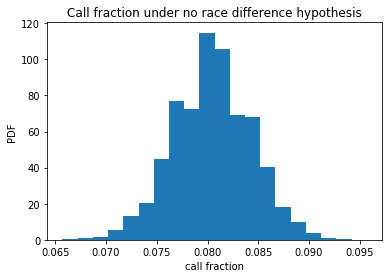

In [34]:
# Your solution to Q3 here
# use bootstrap approach
# a function to permutate call column and assign race of first 2435 observations as 'b', rest as 'w', 
# then calculate fraction of call being 1 in 'b' and 'w'
def permutation_sample_fraction(data1, data2, size=1):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))    #note input to this concatenate needs to be a tuple, hence double parentheses
    perm_replicates = np.empty(size)
    
    for i in range(size):
        # Permute the concatenated array: permuted_data
        permuted_data = np.random.permutation(data)

        # Split the permuted array into two: perm_sample_1, perm_sample_2
        perm_sample_1 = permuted_data[:len(data1)]
        perm_sample_2 = permuted_data[len(data1):]
        
        # Compute the test statistic
        perm_replicates[i] = np.sum(perm_sample_1) / len(perm_sample_1)

    return perm_replicates

call_fraction = permutation_sample_fraction(b['call'], w['call'], 10000)

p = np.sum(call_fraction < sum(b.call) / len(b)) / len(call_fraction)
print('p-value = ', p)

# plot histogram of bootstrap replicate distribution
_ = plt.hist(call_fraction, bins=20, density=True)
_ = plt.xlabel('call fraction')
_ = plt.ylabel('PDF')
_ = plt.title('Call fraction under no race difference hypothesis')

In [40]:
# use frequentist approach, 2-sample t-test to test if call rate for race 'b' and 'w' is the same
# call rate for race 'b'
mean_frac_b_obs = sum(b.call) / len(b)
mean_frac_w_obs = sum(w.call) / len(w)

var_frac_b_obs = mean_frac_b_obs * (1 - mean_frac_b_obs)
var_frac_w_obs = mean_frac_w_obs * (1 - mean_frac_w_obs)

print('race "b"-- ', 'mean fraction: ', mean_frac_b_obs, '      variance: ', var_frac_b_obs)
print('race "w"-- ', 'mean fraction: ', mean_frac_w_obs, '      variance: ', var_frac_w_obs)

t_diff = (mean_frac_b_obs - mean_frac_w_obs) / np.sqrt(var_frac_b_obs / len(b) + var_frac_b_obs / len(w))
p = stats.t.cdf(t_diff, df=len(b)+len(w)-2)
print('t statistic: ', t_diff, '      p-value: ', p)

race "b"--  mean fraction:  0.06447638603696099       variance:  0.060319181680573764
race "w"--  mean fraction:  0.09650924024640657       variance:  0.08719520679346794
t statistic:  -4.5509535366012654       p-value:  2.73517092115657e-06


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

Analysis done above using both bootstrap approach and 2-sample t-test approach come to the same conclusion that statistically significant difference exists between black and white applicants in callback rate for resume submission. Since the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer, this analysis indicates that race discrimination indeed exists in US job market.

This analysis, however does not mean that race/name is the most important factor in callback success. In order to find which factors are most important, the analysis needs to be expanded to include the other factors, for example work experience, skill sets, etc. Statistical significance does not necessarily mean practical importance in terms of the influence of the factors to the desired output/success.